In [1]:
#!pip install -U scikit-learn scipy matplotlib

In [2]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt
import os
import itertools
import glob
from utils import *


In [3]:
iou_treshold = 0.5
IMAGE_WIDTH = 2464
IMAGE_HEIGHT = 2056

SYNTETIC_DATA_DIRECTORY = '/cluster/home/solveijm/DNV_data'
CREATE_TESTSET = False

# Syntethic data folders to be tested on

We have trained on: 
- '2023-04-26_1656_dnv_scenario1_full_00_000_MorningClear' 
- '2023-04-26_1658_dnv_scenario1_full_00_000_MorningCloudy'
- Hurtigruta dataset

In [4]:
light_condition1 = ['2023-04-27_0820_dnv_scenario1_full_00_000_NoonClear']
light_condition2 = ['2023-04-26_1629_dnv_scenario1_full_00_000_AfternoonClear', '2023-04-26_1636_dnv_scenario1_full_00_000_EveningClear']
light_condition3 = ['2023-04-26_1700_dnv_scenario1_full_00_000_NightClear']

cloud_light1 = ['2023-04-27_0822_dnv_scenario1_full_00_000_NoonCloudy']
cloud_light2 = ['2023-04-26_1631_dnv_scenario1_full_00_000_AfternoonCloudy', '2023-04-26_1647_dnv_scenario1_full_00_000_EveningCloudy']
cloud_light3 = ['2023-04-27_0818_dnv_scenario1_full_00_000_NightCloudy']


rain_light1 = ['2023-04-27_0823_dnv_scenario1_full_00_000_NoonCloudy_Rain']
rain_light2 = ['2023-04-26_1649_dnv_scenario1_full_00_000_EveningCloudy_Rain', '2023-04-26_1633_dnv_scenario1_full_00_000_AfternoonCloudy_Rain']

foggy = ['2023-04-26_1652_dnv_scenario1_full_00_000_FoggyClear', '2023-04-26_1654_dnv_scenario1_full_00_000_FoggyCloudy']

stormy = ['2023-04-27_0829_dnv_scenario1_full_00_000_StormClouds']
stormy_rain = ['2023-04-27_0830_dnv_scenario1_full_00_000_StormyClouds_Rain']


all_conditions = [light_condition1, light_condition2, light_condition3, cloud_light1, cloud_light2, cloud_light3, rain_light1, rain_light2, foggy, stormy, stormy_rain]
all_conditions_names = ['light_condition1', 'light_condition2', 'light_condition3', 'cloud_light1', 'cloud_light2', 'cloud_light3', 'rain_light1', 'rain_light2', 'foggy', 'stormy', 'stormy_rain']


## Create test set for each folder

In [5]:
if CREATE_TESTSET:
    test_sets = {}

    for i, condition in enumerate(all_conditions):
        all_image_paths = []
        for folder in condition:
            path = os.path.join(SYNTETIC_DATA_DIRECTORY, folder)+'/images/'
            image_paths = glob.glob(f'{path}*.jpg')
            for image in image_paths:
                all_image_paths.append(os.path.join(path, image))
        test_file = os.path.join(SYNTETIC_DATA_DIRECTORY, f'test_{all_conditions_names[i]}.txt')
        test_sets[all_conditions_names[i]] = test_file
        with open(test_file, 'w+') as f:
            f.writelines('\n'.join(all_image_paths))
    print(test_sets)


# Run tests
To run these remove #! and run in terminal, or just remove # and run in ipynb

## Different light conditions

### Light condition 1

In [6]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_1cls_50e_640imgsz_synthetic/weights/best.pt source='/cluster/home/solveijm/DNV_data/test_light_condition1.txt' imgsz=640 name=test_light_condition1 save=True save_conf=True save_txt=True

Displaying stats
Confusion matrix:
[[699   9]
 [ 63   0]]
Precision:
0.9872881355932204
Recall:
0.9173228346456693


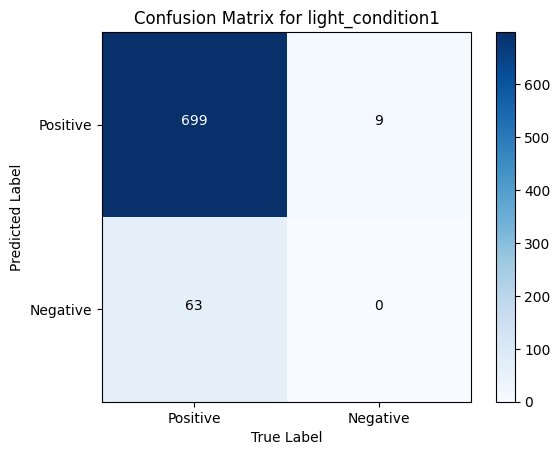

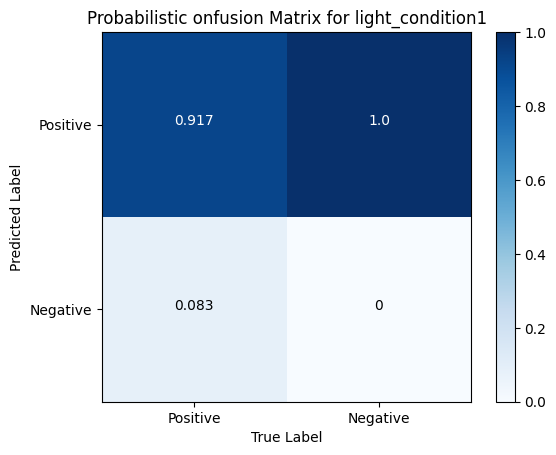



BOUNDING BOX ERRORS FOR light_condition1
IoU threshold:  0.5
Error of center x
Expected value: 0.17465560357143164
Variance: 50.422234808353686

Error of center y
Expected value: 0.720895253571431
Variance: 129.02454244499572

Error of width
Expected value: -0.6235134614285689
Variance: 267.70465575962527

Error of height
Expected value: 0.9432438499999964
Variance: 269.89435060108184


 DROPOUT STATS


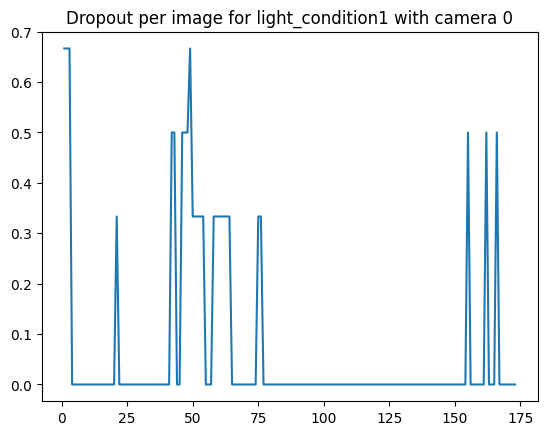

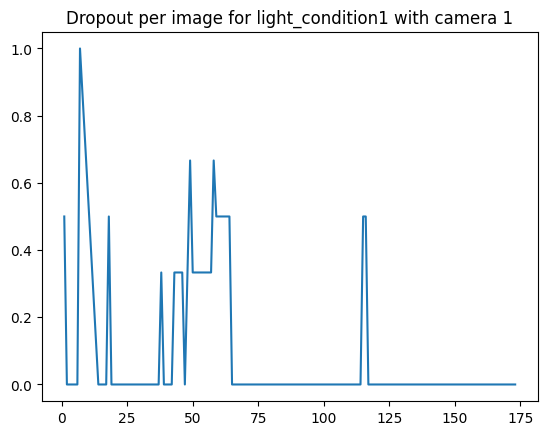

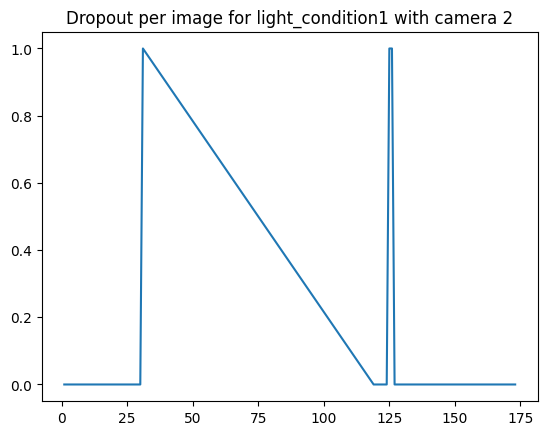

In [7]:
GROUND_TRUTH_PATHS = ['/cluster/home/solveijm/DNV_data/2023-04-27_0820_dnv_scenario1_full_00_000_NoonClear/']
PREDICTED_PATH = '../../runs/detect/test_only_train_on_light1_synthetic/test_light_condition1/labels'

display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, IMAGE_WIDTH, IMAGE_HEIGHT, name='light_condition1')

### Light condition 2

In [8]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_1cls_50e_640imgsz_synthetic/weights/best.pt source='/cluster/home/solveijm/DNV_data/test_light_condition2.txt' imgsz=640 name=test_light_condition2 save=True save_conf=True save_txt=True

Displaying stats
Confusion matrix:
[[353 775]
 [468   0]]
Precision:
0.3129432624113475
Recall:
0.4299634591961023


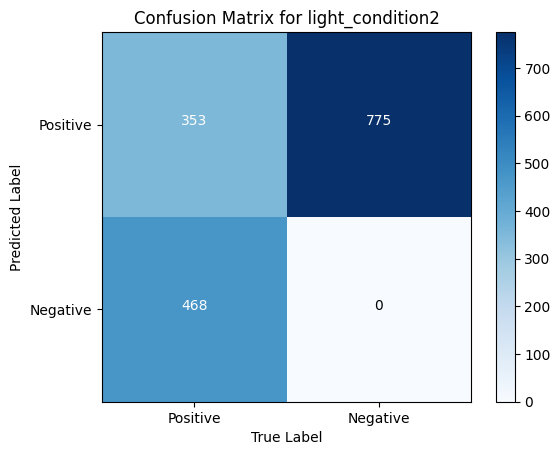

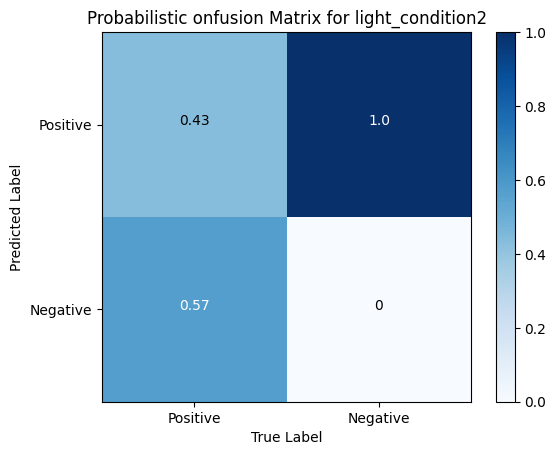



BOUNDING BOX ERRORS FOR light_condition2
IoU threshold:  0.5
Error of center x
Expected value: -3.1731862360406033
Variance: 2537.831009363388

Error of center y
Expected value: -2.9059636637055855
Variance: 1273.801891345641

Error of width
Expected value: -2.9198529796954333
Variance: 8919.789290347459

Error of height
Expected value: -14.389789241116766
Variance: 2781.0581666051858


 DROPOUT STATS


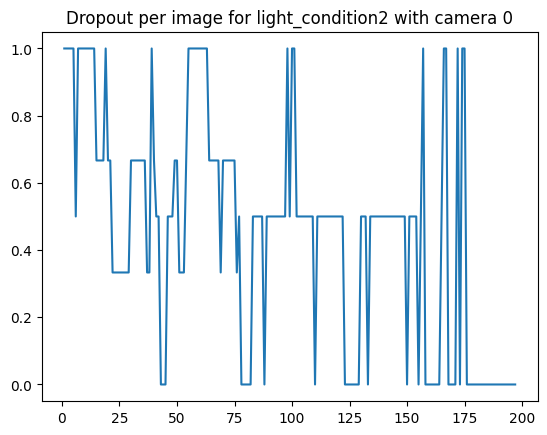

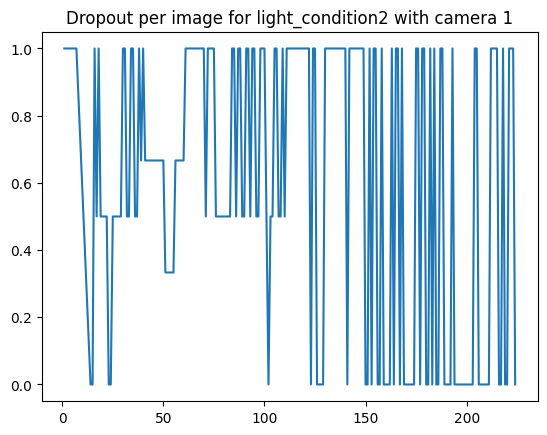

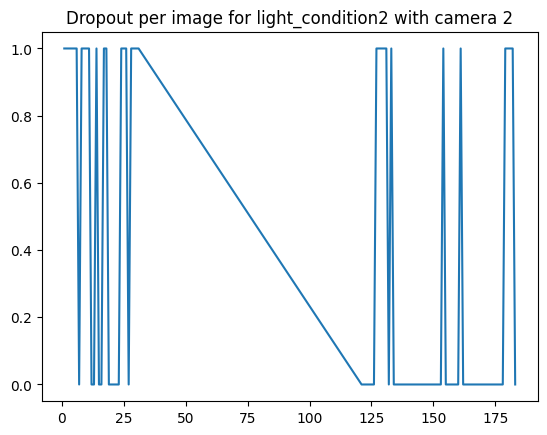

In [9]:
condition_name = 'light_condition2'
condition_folders = light_condition2
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]
PREDICTED_PATH = f'../../runs/detect/test_only_train_on_light1_synthetic/test_{condition_name}/labels'

display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, IMAGE_WIDTH, IMAGE_HEIGHT, name=condition_name)

### Light condition 3

In [10]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_1cls_50e_640imgsz_synthetic/weights/best.pt source='/cluster/home/solveijm/DNV_data/test_light_condition3.txt' imgsz=640 name=test_light_condition3 save=True save_conf=True save_txt=True

Displaying stats
Confusion matrix:
[[202 121]
 [609   0]]
Precision:
0.6253869969040248
Recall:
0.24907521578298397


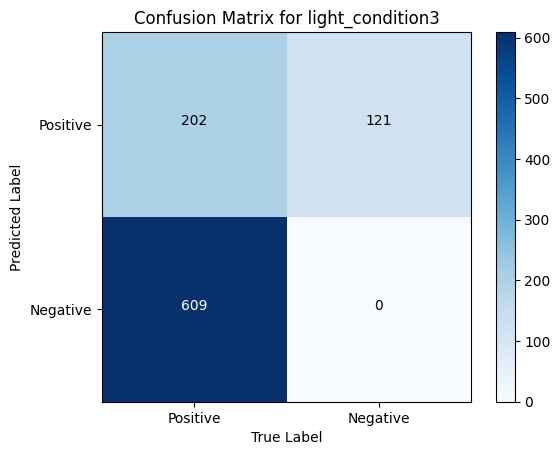

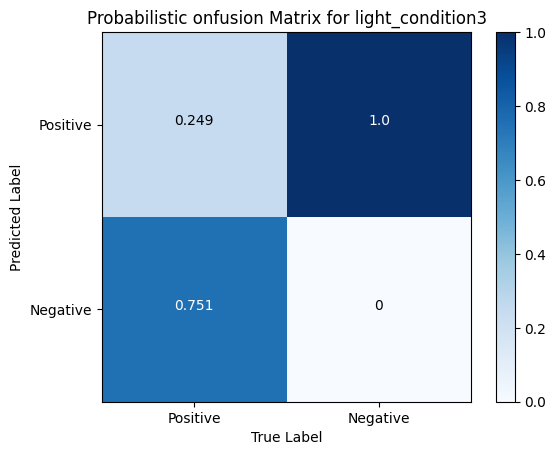



BOUNDING BOX ERRORS FOR light_condition3
IoU threshold:  0.5
Error of center x
Expected value: -6.186001742718453
Variance: 666.1047125817129

Error of center y
Expected value: 4.589489393203876
Variance: 132.95445684400494

Error of width
Expected value: -13.449375291262143
Variance: 5793.632274068399

Error of height
Expected value: 0.03372164077669441
Variance: 641.1480308582411


 DROPOUT STATS


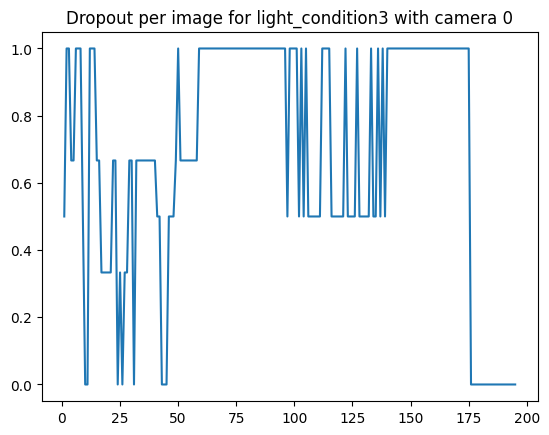

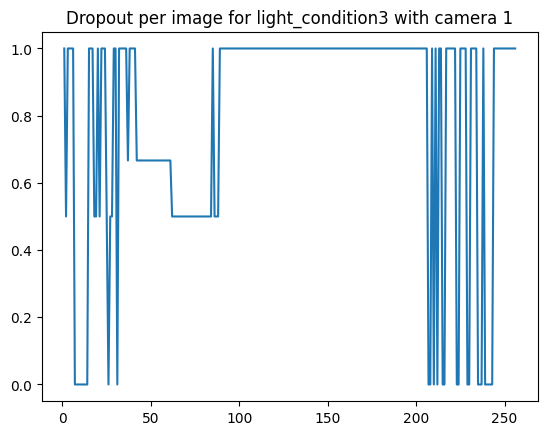

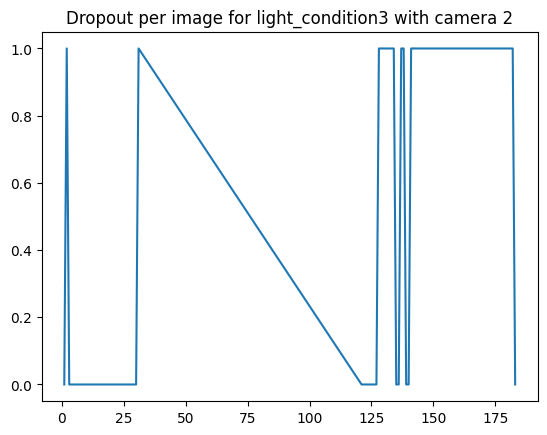

In [11]:
condition_name = 'light_condition3'
condition_folders = light_condition3
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]
PREDICTED_PATH = f'../../runs/detect/test_only_train_on_light1_synthetic/test_{condition_name}/labels'

display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, IMAGE_WIDTH, IMAGE_HEIGHT, name=condition_name)

## Cloud in various light conditions

### Cloud and light1

In [12]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_1cls_50e_640imgsz_synthetic/weights/best.pt source='/cluster/home/solveijm/DNV_data/test_cloud_light1.txt' imgsz=640 name=test_cloud_light1 save=True save_conf=True save_txt=True

Displaying stats
Confusion matrix:
[[475 169]
 [252   0]]
Precision:
0.7375776397515528
Recall:
0.6533700137551581


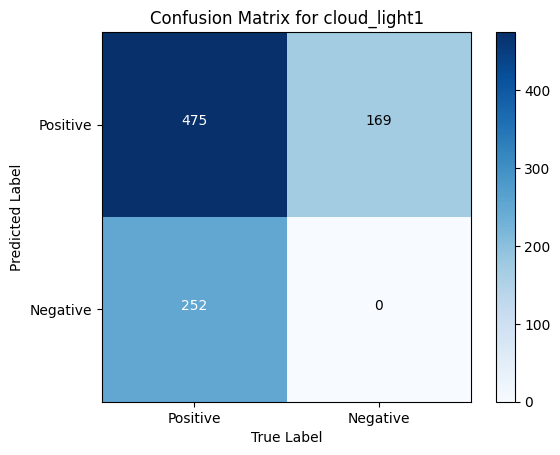

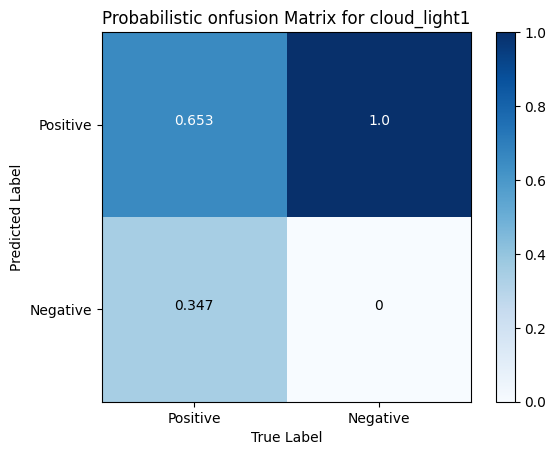



BOUNDING BOX ERRORS FOR cloud_light1
IoU threshold:  0.5
Error of center x
Expected value: 0.572930518404907
Variance: 28.167972268340176

Error of center y
Expected value: 0.9869268640081846
Variance: 241.4060605534963

Error of width
Expected value: 4.390919670756645
Variance: 133.95375296865703

Error of height
Expected value: 8.950612685071572
Variance: 880.8955456969773


 DROPOUT STATS


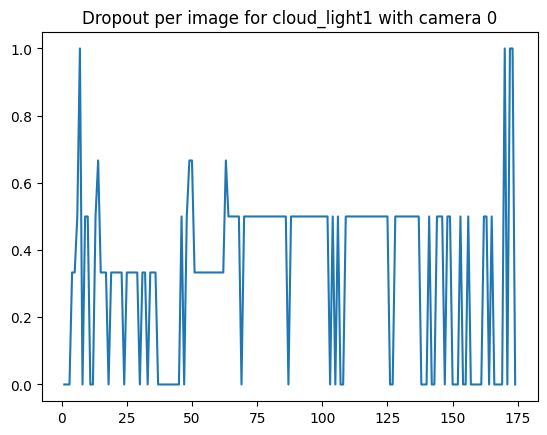

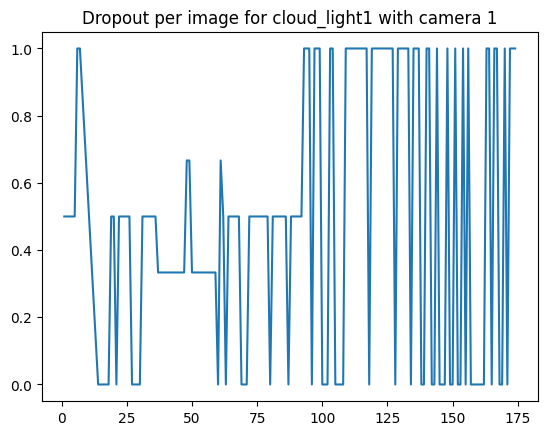

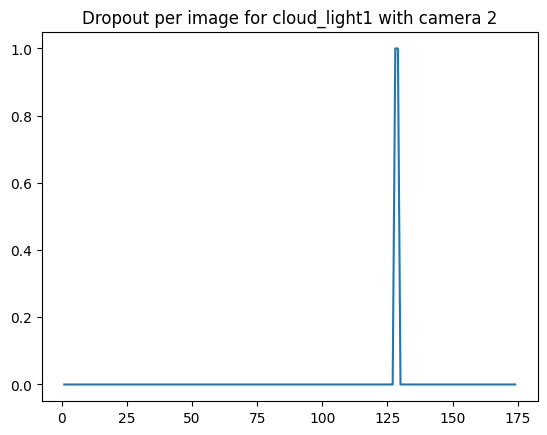

In [13]:
condition_name = 'cloud_light1'
condition_folders = cloud_light1
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]
PREDICTED_PATH = f'../../runs/detect/test_only_train_on_light1_synthetic/test_{condition_name}/labels'

display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, IMAGE_WIDTH, IMAGE_HEIGHT, name=condition_name)

### Cloud and light2

In [14]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_1cls_50e_640imgsz_synthetic/weights/best.pt source='/cluster/home/solveijm/DNV_data/test_cloud_light2.txt' imgsz=640 name=test_cloud_light2 save=True save_conf=True save_txt=True

Displaying stats
Confusion matrix:
[[ 92 395]
 [688   0]]
Precision:
0.188911704312115
Recall:
0.11794871794871795


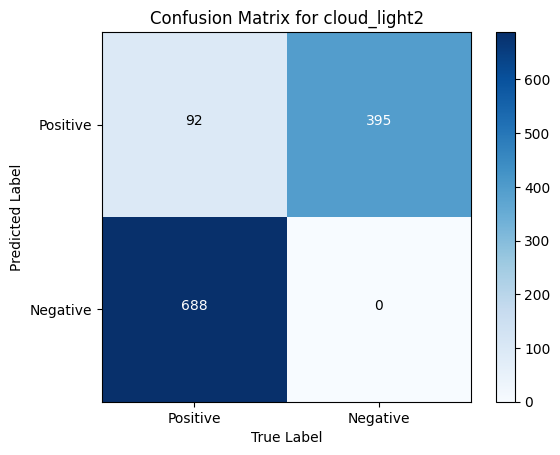

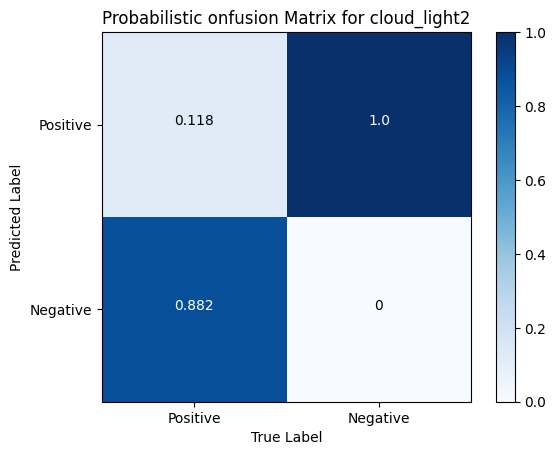



BOUNDING BOX ERRORS FOR cloud_light2
IoU threshold:  0.5
Error of center x
Expected value: -12.035257010638308
Variance: 4127.767429136544

Error of center y
Expected value: 6.606065462765955
Variance: 2958.601224497832

Error of width
Expected value: -23.382187957446796
Variance: 15711.04381598632

Error of height
Expected value: 12.344904414893632
Variance: 3119.163921980158


 DROPOUT STATS


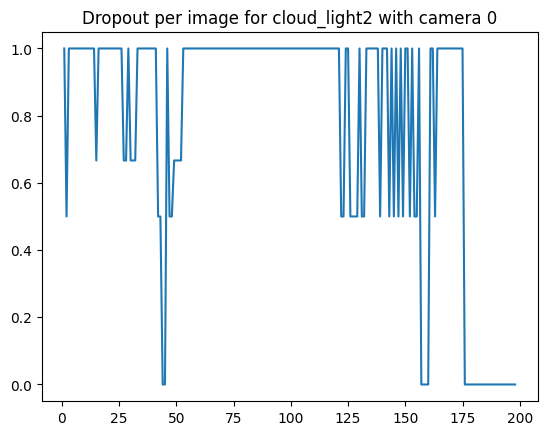

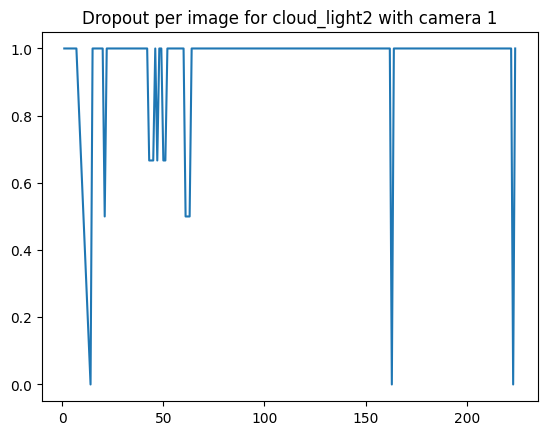

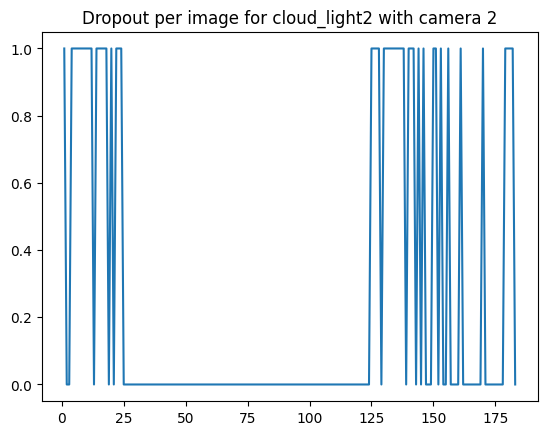

In [15]:
condition_name = 'cloud_light2'
condition_folders = cloud_light2
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]
PREDICTED_PATH = f'../../runs/detect/test_only_train_on_light1_synthetic/test_{condition_name}/labels'

display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, IMAGE_WIDTH, IMAGE_HEIGHT, name=condition_name)

### Cloud and light 3

In [16]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_1cls_50e_640imgsz_synthetic/weights/best.pt source='/cluster/home/solveijm/DNV_data/test_cloud_light3.txt' imgsz=640 name=test_cloud_light3 save=True save_conf=True save_txt=True


Displaying stats
Confusion matrix:
[[188  63]
 [539   0]]
Precision:
0.749003984063745
Recall:
0.2585969738651995


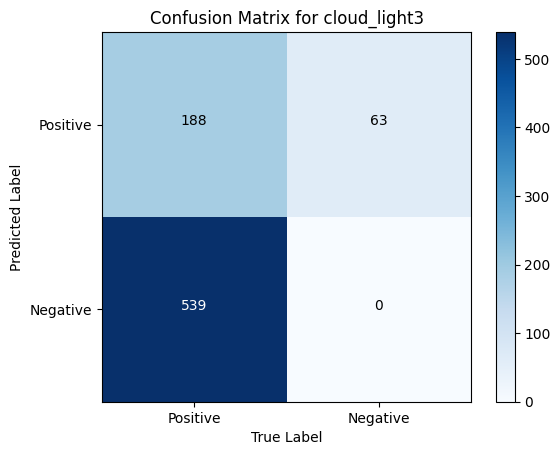

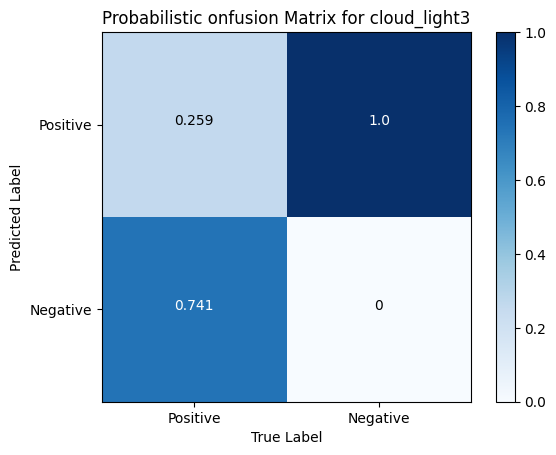



BOUNDING BOX ERRORS FOR cloud_light3
IoU threshold:  0.5
Error of center x
Expected value: -5.7627631941489375
Variance: 1043.331350087163

Error of center y
Expected value: 5.49788405319149
Variance: 272.07888251241314

Error of width
Expected value: -51.36035356914897
Variance: 7011.47044323641

Error of height
Expected value: -1.3878560212765945
Variance: 701.1188897654754


 DROPOUT STATS


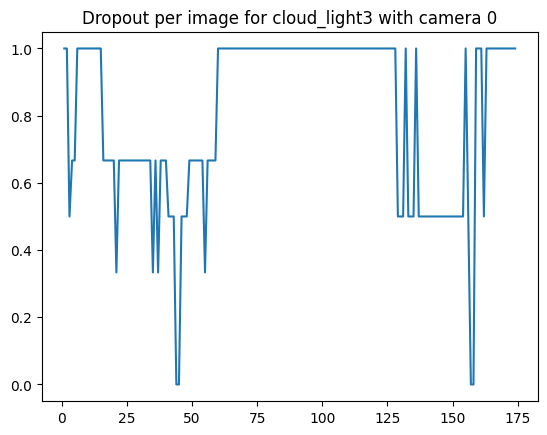

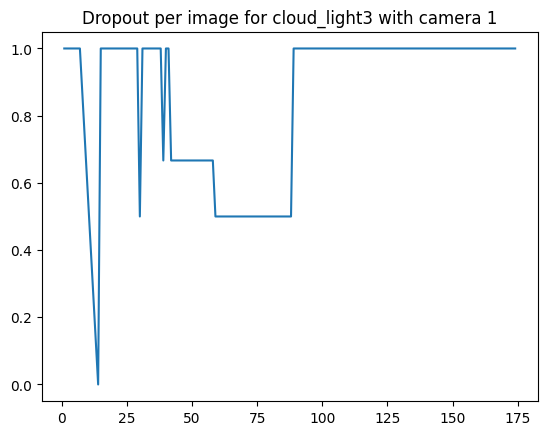

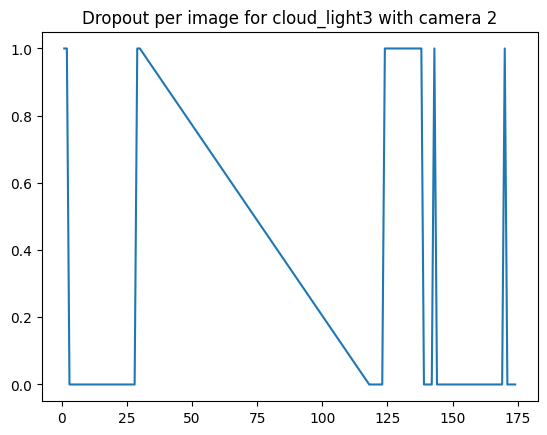

In [17]:
condition_name = 'cloud_light3'
condition_folders = cloud_light3
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]
PREDICTED_PATH = f'../../runs/detect/test_only_train_on_light1_synthetic/test_{condition_name}/labels'

display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, IMAGE_WIDTH, IMAGE_HEIGHT, name=condition_name)

## Rain

### Rain light 1

In [18]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_1cls_50e_640imgsz_synthetic/weights/best.pt source='/cluster/home/solveijm/DNV_data/test_rain_light1.txt' imgsz=640 name=test_rain_light1 save=True save_conf=True save_txt=True


Displaying stats
Confusion matrix:
[[643  65]
 [112   0]]
Precision:
0.9081920903954802
Recall:
0.8516556291390729


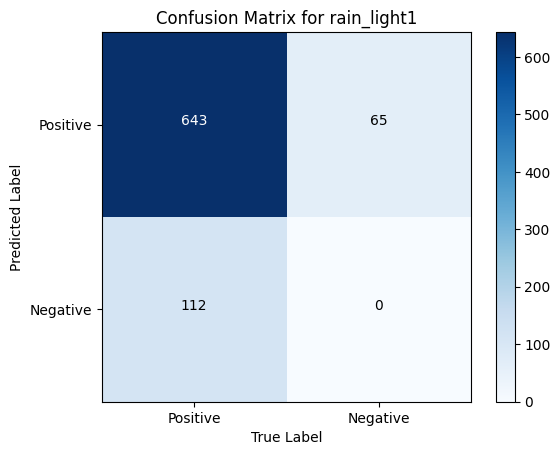

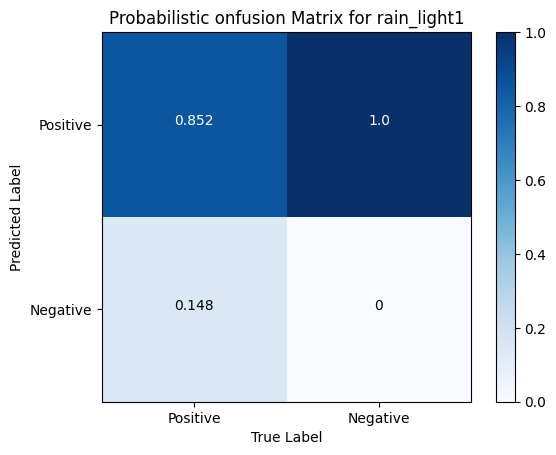



BOUNDING BOX ERRORS FOR rain_light1
IoU threshold:  0.5
Error of center x
Expected value: 0.5246513867362133
Variance: 137.4594688014587

Error of center y
Expected value: -0.9592686318926946
Variance: 104.50897321743713

Error of width
Expected value: 6.288970940387487
Variance: 792.6218237210333

Error of height
Expected value: 7.946623597615492
Variance: 549.0389426480228


 DROPOUT STATS


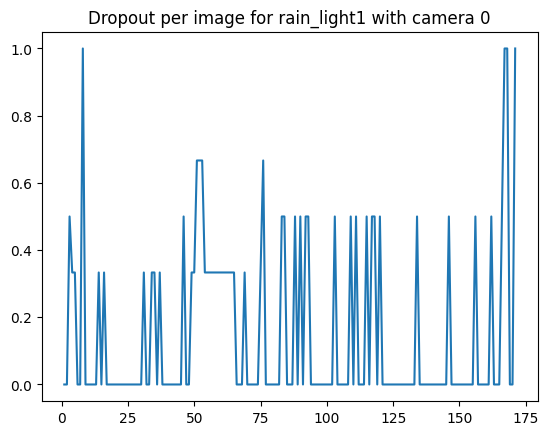

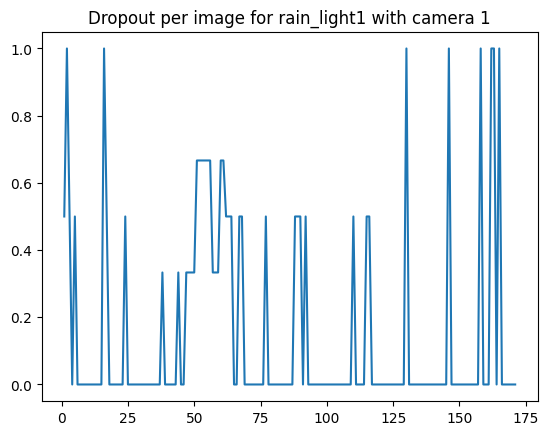

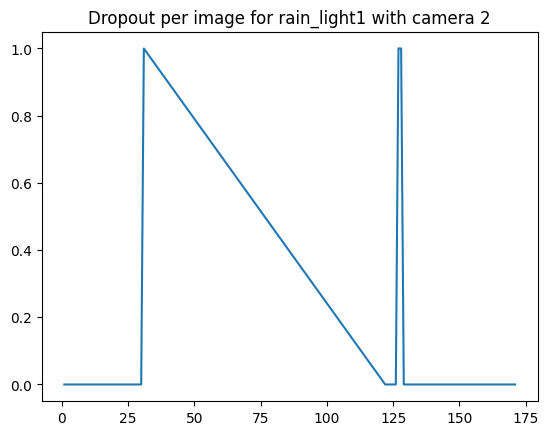

In [19]:
condition_name = 'rain_light1'
condition_folders = rain_light1
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]
PREDICTED_PATH = f'../../runs/detect/test_only_train_on_light1_synthetic/test_{condition_name}/labels'

display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, IMAGE_WIDTH, IMAGE_HEIGHT, name=condition_name)

### Rain light 2

In [20]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_1cls_50e_640imgsz_synthetic/weights/best.pt source='/cluster/home/solveijm/DNV_data/test_rain_light2.txt' imgsz=640 name=test_rain_light2 save=True save_conf=True save_txt=True


Displaying stats
Confusion matrix:
[[334 377]
 [445   0]]
Precision:
0.469760900140647
Recall:
0.4287548138639281


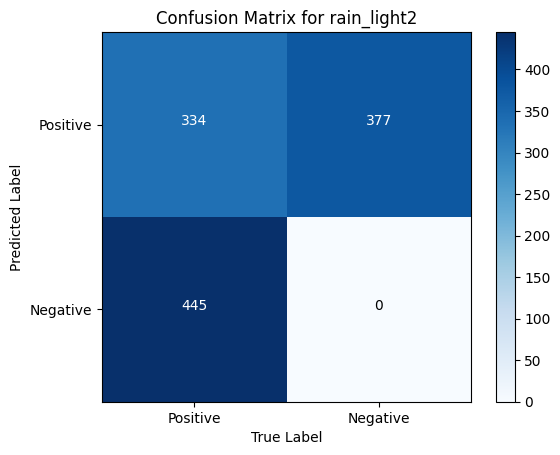

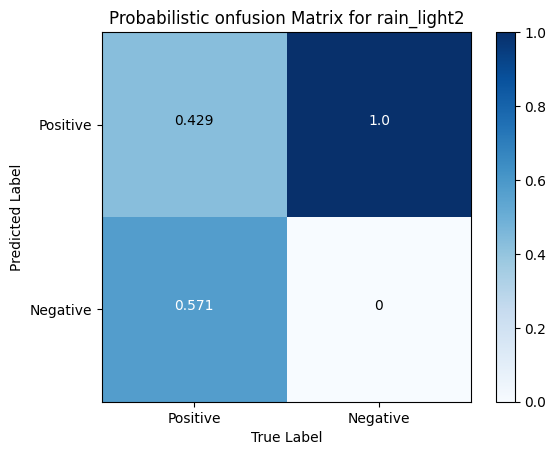



BOUNDING BOX ERRORS FOR rain_light2
IoU threshold:  0.5
Error of center x
Expected value: 9.121558927777773
Variance: 2800.3379497056812

Error of center y
Expected value: 2.485750093055563
Variance: 345.0371147433316

Error of width
Expected value: 22.179391127777784
Variance: 11189.220152918973

Error of height
Expected value: 10.910032591666665
Variance: 1021.5986070494472


 DROPOUT STATS


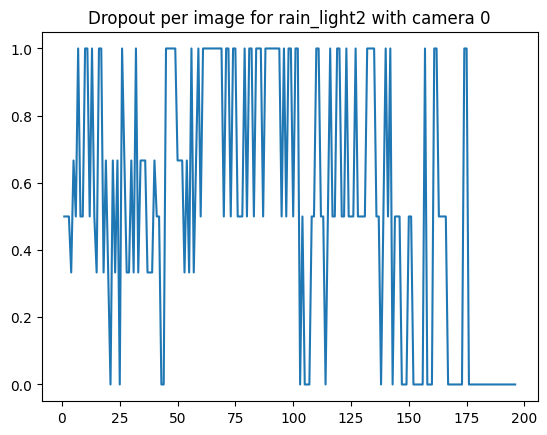

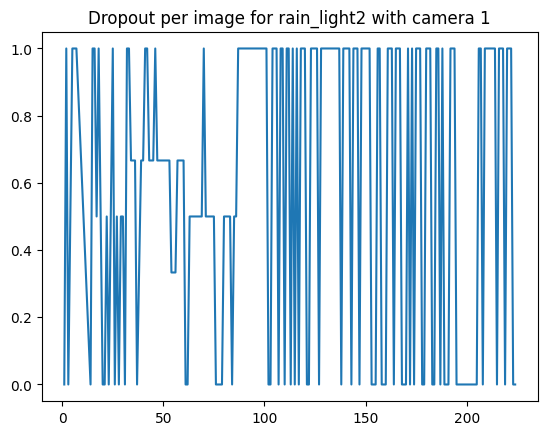

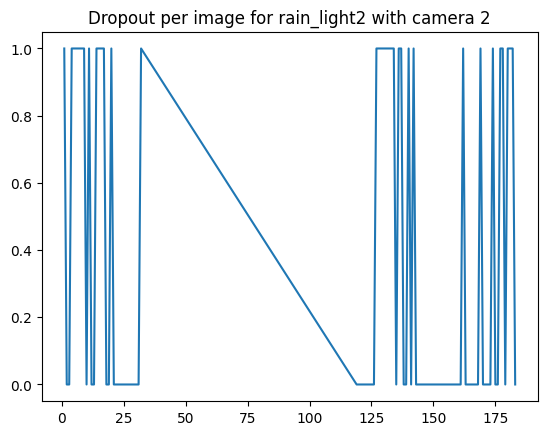

In [28]:
condition_name = 'rain_light2'
condition_folders = rain_light2
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]
PREDICTED_PATH = f'../../runs/detect/test_only_train_on_light1_synthetic/test_{condition_name}/labels'

display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, IMAGE_WIDTH, IMAGE_HEIGHT, name=condition_name)

## Fog

In [22]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_1cls_50e_640imgsz_synthetic/weights/best.pt source='/cluster/home/solveijm/DNV_data/test_foggy.txt' imgsz=640 name=test_foggy save=True save_conf=True save_txt=True


Displaying stats
Confusion matrix:
[[  6   3]
 [804   0]]
Precision:
0.6666666666666666
Recall:
0.007407407407407408


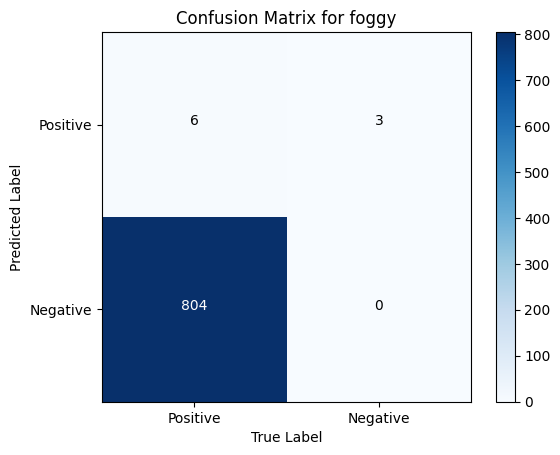

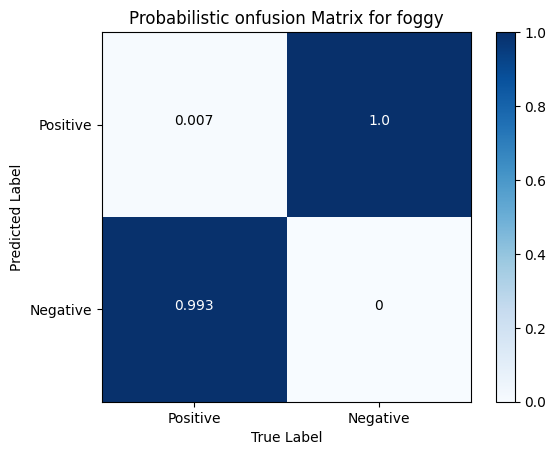



BOUNDING BOX ERRORS FOR foggy
IoU threshold:  0.5
Error of center x
Expected value: -0.5112205714286152
Variance: 2093.095346032303

Error of center y
Expected value: 6.973379928571425
Variance: 1076.4609518526297

Error of width
Expected value: -63.63595342857146
Variance: 17778.29072354588

Error of height
Expected value: -83.31290128571428
Variance: 841.5691377033339


 DROPOUT STATS


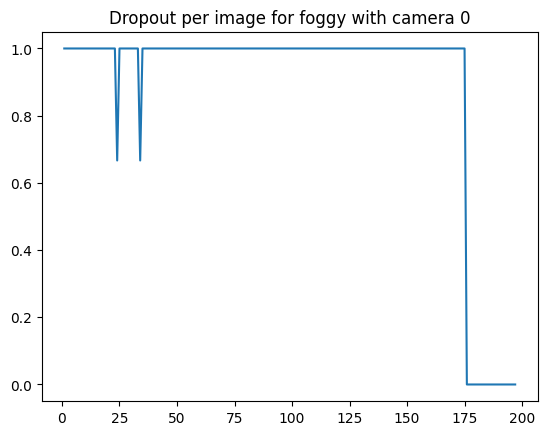

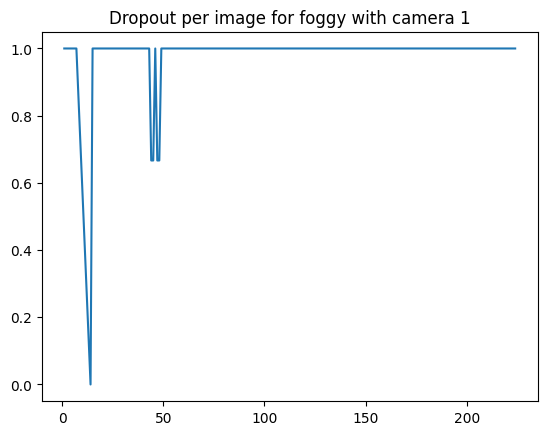

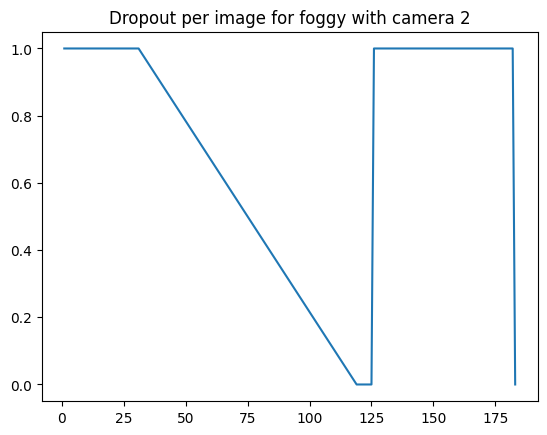

In [23]:
condition_name = 'foggy'
condition_folders = foggy
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]
PREDICTED_PATH = f'../../runs/detect/test_only_train_on_light1_synthetic/test_{condition_name}/labels'

display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, IMAGE_WIDTH, IMAGE_HEIGHT, name=condition_name)

## Stormy

In [24]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_1cls_50e_640imgsz_synthetic/weights/best.pt source='/cluster/home/solveijm/DNV_data/test_stormy.txt' imgsz=640 name=test_stormy save=True save_conf=True save_txt=True


Displaying stats
Confusion matrix:
[[  2   1]
 [721   0]]
Precision:
0.6666666666666666
Recall:
0.0027662517289073307


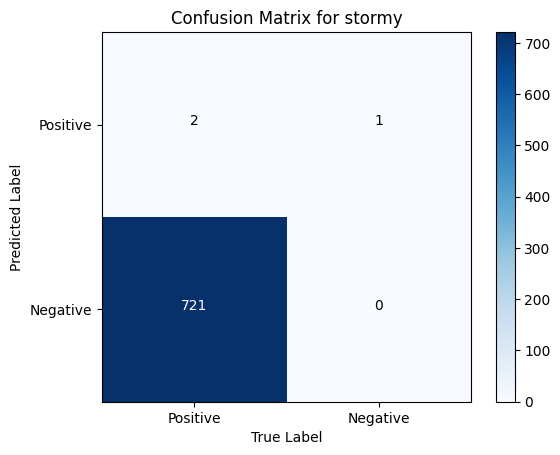

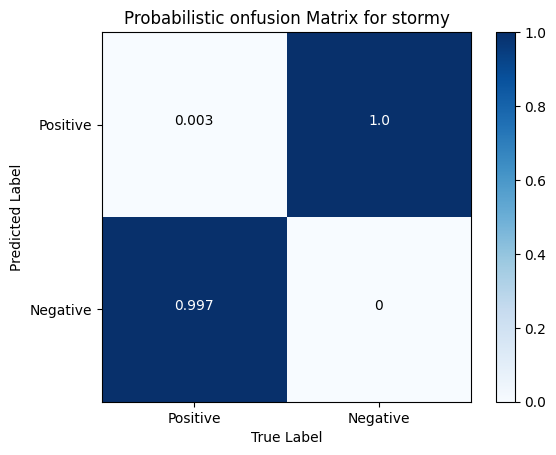



BOUNDING BOX ERRORS FOR stormy
IoU threshold:  0.5
Error of center x
Expected value: -10.561263999999824
Variance: 475.53955739003294

Error of center y
Expected value: -8.412689
Variance: 0.8567316576040672

Error of width
Expected value: -140.03506499999997
Variance: 17303.785525173305

Error of height
Expected value: -12.397887999999966
Variance: 339.167619582013


 DROPOUT STATS


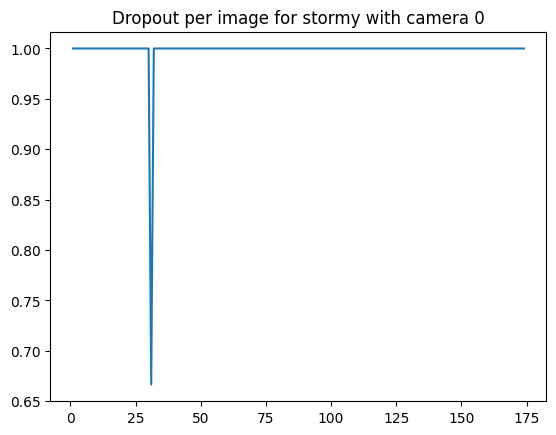

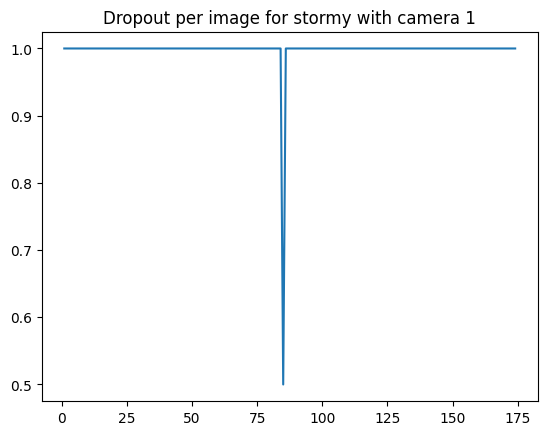

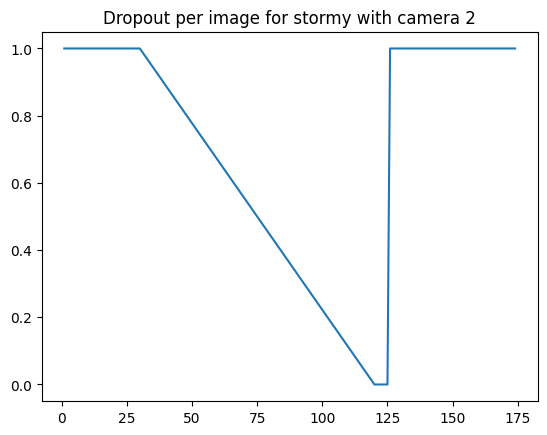

In [25]:
condition_name = 'stormy'
condition_folders = stormy
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]
PREDICTED_PATH = f'../../runs/detect/test_only_train_on_light1_synthetic/test_{condition_name}/labels'

display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, IMAGE_WIDTH, IMAGE_HEIGHT, name=condition_name)

## Stormy and rain

In [26]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_1cls_50e_640imgsz_synthetic/weights/best.pt source='/cluster/home/solveijm/DNV_data/test_stormy_rain.txt' imgsz=640 name=test_stormy_rain save=True save_conf=True save_txt=True


/cluster/work/solveijm/MODSIM/src/detection/utils.py:100: RuntimeWarning: invalid value encountered in scalar divide
  return tp / (tp + fp)


Displaying stats
Confusion matrix:
[[  0   0]
 [708   0]]
Precision:
nan
Recall:
0.0


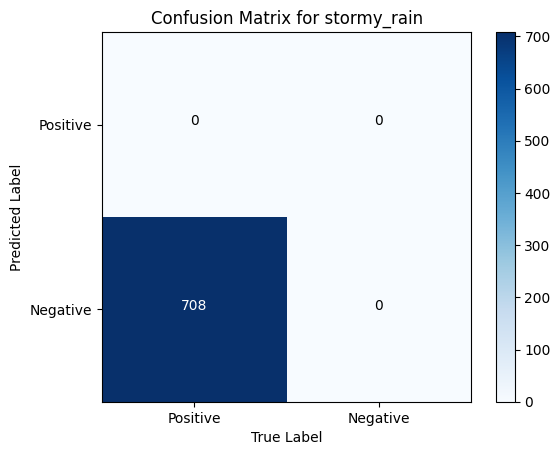

/cluster/work/solveijm/MODSIM/src/detection/utils.py:125: RuntimeWarning: invalid value encountered in scalar divide
  probabilistic_confusion_matrix = [[round(tp/total_annotations,3), fp/fp],[round(fn/total_annotations,3), 0]]


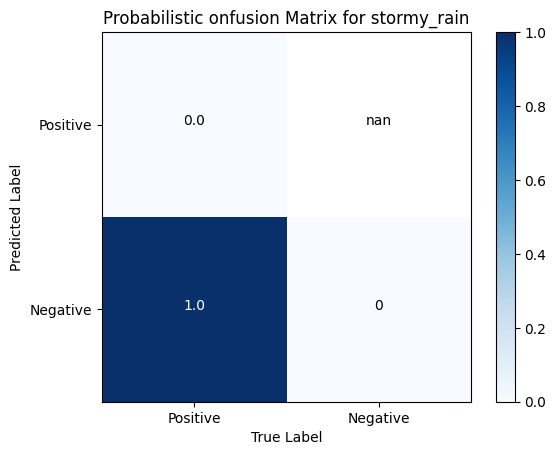



BOUNDING BOX ERRORS FOR stormy_rain
IoU threshold:  0.5
Error of center x


ZeroDivisionError: division by zero

In [27]:
condition_name = 'stormy_rain'
condition_folders = stormy_rain
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]
PREDICTED_PATH = f'../../runs/detect/test_only_train_on_light1_synthetic/test_{condition_name}/labels'

display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, IMAGE_WIDTH, IMAGE_HEIGHT, name=condition_name)